# Taller de Machine Learning

---



**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Mayo 2025

**Versión:** 1.0  



---

## Descripción


Este notebook muestra la creación de un modelo de clasificación sobre un conjunto de datos con la finalidad de predecir si una persona adopta o no una mascota.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- matplotlib (3.10.0)
- pandas (2.2.2)
- seaborn (0.13.2)
- sklearn (1.6.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [1]:
!wget -O adopta_mascota.csv https://raw.githubusercontent.com/JaznaLaProfe/TechSchool/main/data/adopta_mascota.csv

--2025-05-30 23:30:46--  https://raw.githubusercontent.com/JaznaLaProfe/TechSchool/main/data/adopta_mascota.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103689 (101K) [text/plain]
Saving to: ‘adopta_mascota.csv’

adopta_mascota.csv  100%[===================>] 101.26K  --.-KB/s    in 0.02s   

2025-05-30 23:30:47 (5.12 MB/s) - ‘adopta_mascota.csv’ saved [103689/103689]



In [52]:
# Primero, instale Gradio
!pip install --quiet gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.7 MB/s eta 0:00:00


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import gradio as gr

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [22]:
# Carga el conjunto de datos
data = pd.read_csv("adopta_mascota.csv")
data.head(7)

,edad,prefiere_tipo,nivel_actividad,vive_en_departamento,acompañante,tiempo_libre,ingresos_mensuales,adopta
0,56,gato,bajo,0,solo,1.8,NaN,0
1,46,gato,alto,0,solo,4.6,2468.0,1
2,32,perro,bajo,1,amigo,3.9,1497.0,1
3,60,ambos,bajo,1,familia,4.7,3282.0,1
4,25,ambos,medio,1,familia,3.5,2241.0,1
5,38,gato,medio,0,solo,2.6,1566.0,0
6,56,gato,medio,0,amigo,4.3,1588.0,0


In [23]:
data.isnull().sum()

,0
edad,0
prefiere_tipo,0
nivel_actividad,0
vive_en_departamento,0
acompañante,0
tiempo_libre,0
ingresos_mensuales,300
adopta,0


In [24]:
# Muestra una tabla con los % de nulos de cada columa
columnas_con_nulos = data.isna().sum()[data.isna().sum() > 0]
porcentaje_nulos = (columnas_con_nulos / data.shape[0]) * 100

resultado = pd.DataFrame({
    "Cantidad Nulos": columnas_con_nulos,
    "Porcentaje Nulos (%)": porcentaje_nulos
}).round(2)

resultado

,Cantidad Nulos,Porcentaje Nulos (%)
ingresos_mensuales,300,10.0


# Preparación de datos

✅ **Imputación de valores nulos**

Existen variadas técnicas para reemplazar los valores nulos:

+ Eliminarlos
+Reemplazar por un valor representativo que depende del tipo de columna.
+Usar técnicas más avanzadas como KNN-Imputer que reemplaza los valores nulos por un valor representativo de sus vecinos más cercanos (lo ideal es que los datos se encuentren estandarizados).

En caso de que la columna sea cuantitativa, las opciones son:

+ Reemplazar por el promedio: esto es recomendable SÓLO ante la inexistencia de **valores atípicos**.
+Reemplazar por la mediana: esto es recomendable cuando existen **valores atípicos**.

En caso de que la columna sea cualitativa entonces se reemplaza por el valor con mayor frecuencia



**❓ ¿Valores atípicos?**

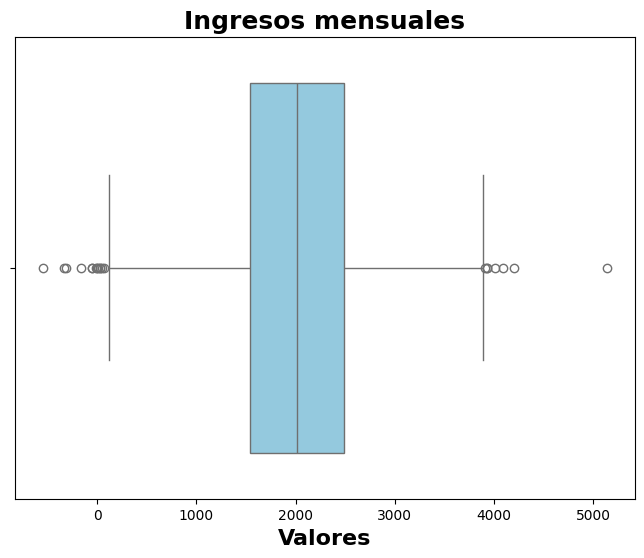

In [25]:
# Gráfico de caja
plt.figure(figsize=(8, 6))
sb.boxplot(x=data['ingresos_mensuales'], color='skyblue')
plt.title('Ingresos mensuales', fontsize=18, fontweight="bold")
plt.xlabel('Valores', fontsize=16, fontweight="bold")
plt.show()

In [26]:
data["ingresos_mensuales"] = data["ingresos_mensuales"].fillna(data["ingresos_mensuales"].median())

In [27]:
ordinal_features = ["nivel_actividad"]
nonimal_features = ["prefiere_tipo", "acompañante"]
for feature in ordinal_features:
    encoder = OrdinalEncoder(categories=[data[feature].unique()])
    data[f'{feature}_codificado'] = encoder.fit_transform(data[[feature]])

for feature in nonimal_features:
    encoder = LabelEncoder()
    data[f'{feature}_codificado'] = encoder.fit_transform(data[feature])

In [28]:
data.head()

,edad,prefiere_tipo,nivel_actividad,vive_en_departamento,acompañante,tiempo_libre,ingresos_mensuales,adopta,nivel_actividad_codificado,prefiere_tipo_codificado,acompañante_codificado
0,56,gato,bajo,0,solo,1.8,2013.0,0,0.0,1,2
1,46,gato,alto,0,solo,4.6,2468.0,1,1.0,1,2
2,32,perro,bajo,1,amigo,3.9,1497.0,1,0.0,2,0
3,60,ambos,bajo,1,familia,4.7,3282.0,1,0.0,0,1
4,25,ambos,medio,1,familia,3.5,2241.0,1,2.0,0,1


In [29]:

# Devuelve un DataFrame con las filas duplicadas
duplicados = data[data.duplicated()]
duplicados


,edad,prefiere_tipo,nivel_actividad,vive_en_departamento,acompañante,tiempo_libre,ingresos_mensuales,adopta,nivel_actividad_codificado,prefiere_tipo_codificado,acompañante_codificado
2547,56,perro,bajo,1,solo,4.4,2013.0,1,0.0,2,2


In [30]:

# Encontrar los duplicados, como una forma de comprobar
def obtiene_duplicados(data : pd.DataFrame, idx : int) -> pd.DataFrame:
  # Obtiene la fila específica
  fila_especifica = data.loc[[idx]]

  # Filtra todas las filas que sean idénticas a la fila específica
  return data[data.eq(fila_especifica.iloc[0]).all(axis=1)]

In [31]:
obtiene_duplicados(data, 2547)

,edad,prefiere_tipo,nivel_actividad,vive_en_departamento,acompañante,tiempo_libre,ingresos_mensuales,adopta,nivel_actividad_codificado,prefiere_tipo_codificado,acompañante_codificado
2244,56,perro,bajo,1,solo,4.4,2013.0,1,0.0,2,2
2547,56,perro,bajo,1,solo,4.4,2013.0,1,0.0,2,2


In [32]:
# Detecta duplicados considerando todas las columnas
# El parámetro keep en False considera como duplicado la primera ocurrencia
# El valor por defecto es 'first' que permite marcar como duplicados todas las filas exceptuando la primera ocurrencia
duplicados = data[data.duplicated(keep=False)]
duplicados

,edad,prefiere_tipo,nivel_actividad,vive_en_departamento,acompañante,tiempo_libre,ingresos_mensuales,adopta,nivel_actividad_codificado,prefiere_tipo_codificado,acompañante_codificado
2244,56,perro,bajo,1,solo,4.4,2013.0,1,0.0,2,2
2547,56,perro,bajo,1,solo,4.4,2013.0,1,0.0,2,2


In [36]:
# Elimina duplicados considerando todas las columnas
data = data.drop_duplicates()

In [37]:
# Devuelve un DataFrame con las filas duplicadas
duplicados = data[data.duplicated()]
duplicados

,edad,prefiere_tipo,nivel_actividad,vive_en_departamento,acompañante,tiempo_libre,ingresos_mensuales,adopta,nivel_actividad_codificado,prefiere_tipo_codificado,acompañante_codificado


Correlaciones con la variable objetivo:
edad                          0.010676
vive_en_departamento          0.208816
tiempo_libre                  0.375034
ingresos_mensuales            0.105258
nivel_actividad_codificado    0.018378
prefiere_tipo_codificado     -0.048916
acompañante_codificado       -0.000176
Name: adopta, dtype: float64


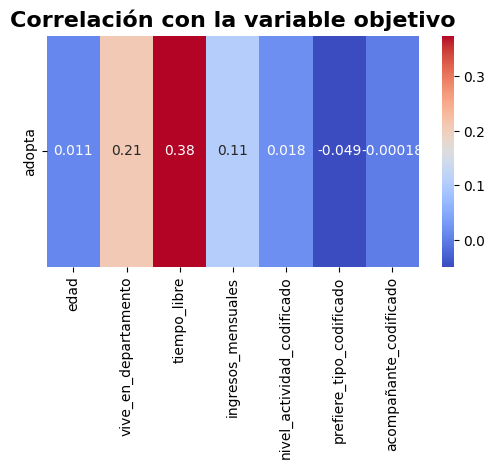

In [41]:
# Cálculo de las correlaciones
correlaciones = data.corr(numeric_only=True)["adopta"].drop("adopta")

# Visualización de las correlaciones
plt.figure(figsize=(6, 3))
sb.heatmap(correlaciones.to_frame().T, annot=True, cmap="coolwarm",  linecolor="black")
plt.title("Correlación con la variable objetivo", fontsize=16, fontweight="bold")
plt.show()

In [44]:
# Definir el umbral deseado
umbral = 0.2

# Filtrar variables con correlación absoluta superior al umbral
caracteristicas_seleccionadas = correlaciones[correlaciones.abs() > umbral]

print("Características seleccionadas (|correlación| > umbral):")
print(caracteristicas_seleccionadas.index)

Características seleccionadas (|correlación| > umbral):
Index(['vive_en_departamento', 'tiempo_libre'], dtype='object')


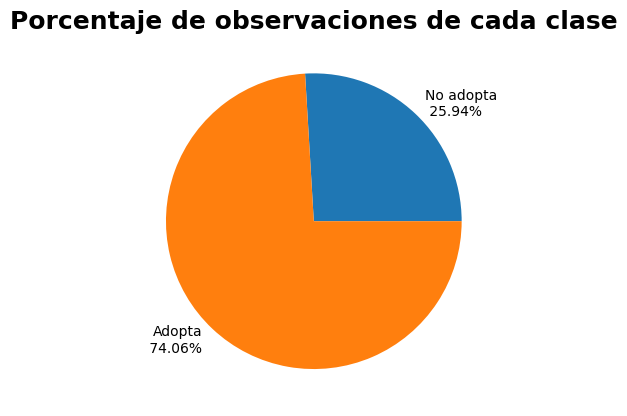

In [50]:
# Gráfico de tortas del porcentaje de muestras de cada clase
clases = np.array([data[data.adopta == 0.0].shape[0],
                   data[data.adopta == 1.0].shape[0]])

# Creando las leyendas del gráfico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'No adopta\n ' + labels[0]
labels[1] = 'Adopta\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de observaciones de cada clase', fontsize=18, fontweight="bold")
plt.show()


![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRMDDV1E_EMCTrpoIN65Hz7L8gXjILKba0ylw&s)

# Generación modelo

In [ ]:
X = data[np.array(caracteristicas_seleccionadas.index)]
y = data['adopta']
# Separación de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [ ]:
# Crear y entrenar el modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=29)
modelo.fit(X_train, y_train)

In [51]:
# Evaluación
print(classification_report(y_test, modelo.predict(X_test), target_names=['NO adopta', 'Adopta']))

              precision    recall  f1-score   support

   NO adopta       0.52      0.40      0.45       149
      Adopta       0.82      0.88      0.84       451

    accuracy                           0.76       600
   macro avg       0.67      0.64      0.65       600
weighted avg       0.74      0.76      0.75       600



# Despliegue

In [67]:
# Despliegue con Gradio
def predict(vive_depto : str, tiempo_libre : float):
    # Validar tiempo libre
    if tiempo_libre is None:
        return "⚠️ Por favor, ingresa un número para el tiempo libre."
    if tiempo_libre < 0:
        return "⚠️ El tiempo libre no puede ser negativo."
    if vive_depto is None:
        return "⚠️ Por favor, selecciona si vives en departamento"
    vive_depto_binario = 1 if vive_depto.lower() == "Sí" else 0
    data = pd.DataFrame([[vive_depto_binario, tiempo_libre]], columns=['vive_en_departamento', 'tiempo_libre'])
    prediccion = modelo.predict(data)[0]
    return "Adopta" if prediccion == 1 else "No Adopta"

iface = gr.Interface(fn=predict,
                     inputs=[gr.Radio(["No", "Sí"], label="¿Vive en departamento?"),
                             gr.Number(label="Tiempo libre")],
                     outputs="text",
                     title="Predicción de Adopción de Mascota",
                      description="Completa los datos para predecir si una persona adoptaría una mascota.")

In [68]:
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ea336b3c97c44aadd3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Mejorando la interfaz

In [71]:
iface_mejorada = gr.Interface(fn=predict,
                     inputs=[gr.Radio(["No", "Sí"], label="¿Vive en departamento?"),
                             gr.Number(label="Tiempo libre")],
                     outputs=[gr.Label(label="Resultado")],
                     title="Predicción de Adopción de Mascota",
                      description="Completa los datos para predecir si una persona adoptaría una mascota.",
                              submit_btn=gr.Button("Predecir"))

In [72]:
iface_mejorada.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://61c75015bf38c4bdcf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
